In [1]:
import pymysql
from sqlalchemy import create_engine
import getpass
password = getpass.getpass()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import pymysql
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
f_rentals = pd.read_sql_query('select* from february_rentals;', engine)
f_rentals.head()

,film_id,f_total_rentals
0,2,1
1,4,1
2,5,1
3,13,1
4,17,1


In [3]:
a_rentals = pd.read_sql_query('select* from august_rentals;', engine)
a_rentals.head()

,film_id,a_total_rentals
0,1,9
1,2,4
2,3,6
3,4,6
4,5,3


### 1. Exploring data

In [ ]:
f_rentals.isna().sum()

In [ ]:
f_rentals.shape

In [ ]:
f_rentals.info()

In [ ]:
a_rentals.isna().sum()

In [ ]:
a_rentals.shape

In [ ]:
a_rentals.info()

### 2. Merge Data

In [8]:
df=a_rentals.merge(f_rentals, on='film_id',how='outer')
df

,film_id,a_total_rentals,f_total_rentals
0,1,9,NaN
1,2,4,1.0
2,3,6,NaN
3,4,6,1.0
4,5,3,1.0
...,...,...,...
953,996,3,NaN
954,997,3,NaN
955,998,2,1.0
956,999,7,NaN


In [9]:
df=df.fillna(0)
df

,film_id,a_total_rentals,f_total_rentals
0,1,9,0.0
1,2,4,1.0
2,3,6,0.0
3,4,6,1.0
4,5,3,1.0
...,...,...,...
953,996,3,0.0
954,997,3,0.0
955,998,2,1.0
956,999,7,0.0


### 3.Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

In [11]:
df.nunique()

film_id            958
a_total_rentals     13
f_total_rentals      3
boolean_column       2
dtype: int64

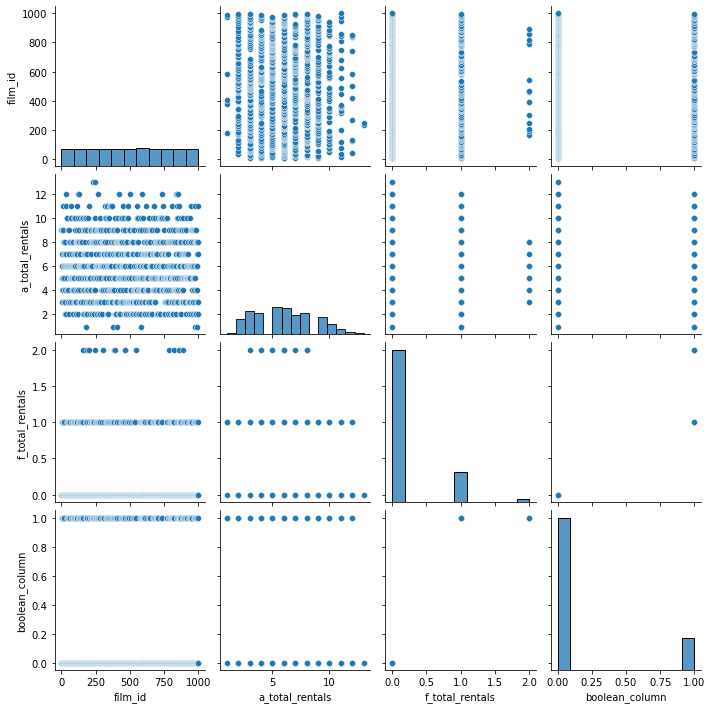

In [12]:
sns.pairplot(df)

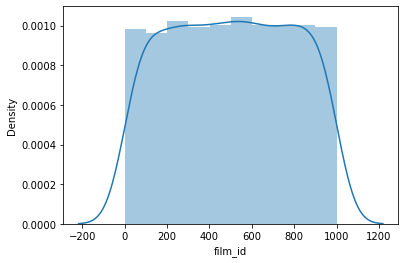

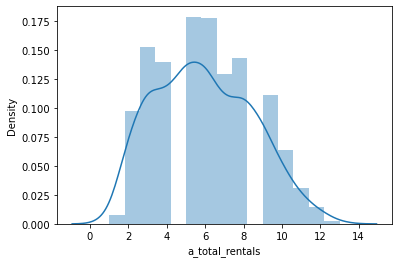

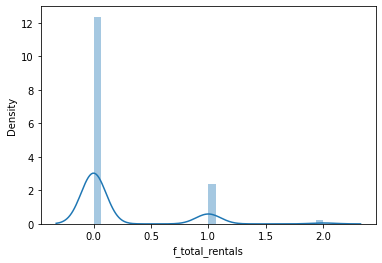

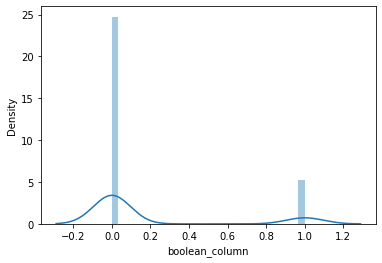

In [13]:
for column in df.columns:
    sns.distplot(df[column])
    plt.show()

### 4.Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.

In [26]:
df['boolean_column'] = np.where(df['f_total_rentals'] > 0, 1, 0)
df

,film_id,a_total_rentals,f_total_rentals,boolean_column
0,1,9,0.0,0
1,2,4,1.0,1
2,3,6,0.0,0
3,4,6,1.0,1
4,5,3,1.0,1
...,...,...,...,...
953,996,3,0.0,0
954,997,3,0.0,0
955,998,2,1.0,1
956,999,7,0.0,0


### 5.Create a logistic regression model to predict this variable from the cleaned data.

In [14]:
X = df.drop('boolean_column',axis = 1)
y = df['boolean_column']

In [15]:
X

,film_id,a_total_rentals,f_total_rentals
0,1,9,0.0
1,2,4,1.0
2,3,6,0.0
3,4,6,1.0
4,5,3,1.0
...,...,...,...
953,996,3,0.0
954,997,3,0.0
955,998,2,1.0
956,999,7,0.0


In [16]:
y

0      0
1      1
2      0
3      1
4      1
      ..
953    0
954    0
955    1
956    0
957    0
Name: boolean_column, Length: 958, dtype: int32

In [17]:
transformer = StandardScaler()
transformer.fit(X)

X_num_std = transformer.transform(X)
X_num_std= pd.DataFrame(X_num_std, columns=X.columns, index=X.index)
X_num_std.head()

,film_id,a_total_rentals,f_total_rentals
0,-1.745347,1.209978,-0.443961
1,-1.741867,-0.764066,1.892931
2,-1.738388,0.025551,-0.443961
3,-1.734908,0.025551,1.892931
4,-1.731429,-1.158875,1.892931


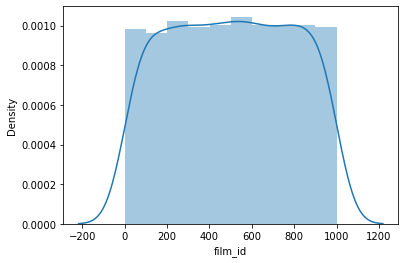

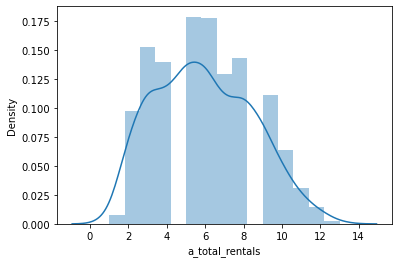

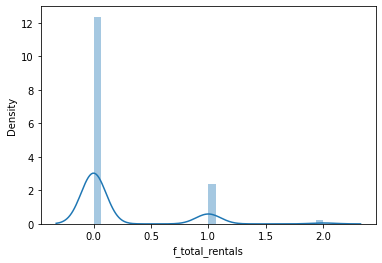

In [18]:
for column in X.columns:
    sns.distplot(X[column])
    plt.show()

### 5.Create a logistic regression model to predict this variable from the cleaned data.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
len(X_test)

288

In [21]:
classing = LogisticRegression(random_state=0, multi_class = 'ovr').fit(X_train, y_train)
predictions = classing.predict(X_test)

In [22]:
confusion_matrix(y_test,predictions)

array([[248,   0],
       [  0,  40]], dtype=int64)

In [23]:
classing.score(X_test,y_test)

1.0

### 6.Evaluate the results.

<AxesSubplot:>

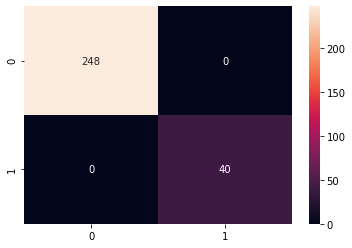

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True,fmt='g')